<a href="https://colab.research.google.com/github/MalaikaPasha/DAE-ViT-KneeXray-Denoising/blob/main/DAE_ViT_KneeXray_Denoising.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch

In [ ]:
torch.cuda.is_available()

True

In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"malaikapasha","key":"26dcb2045f9e17708bfa28538c4383ec"}'}

In [ ]:
!pip install kaggle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [ ]:
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d shashwatwork/knee-osteoarthritis-dataset-with-severity

 99% 202M/204M [00:09<00:00, 25.5MB/s]
100% 204M/204M [00:09<00:00, 21.7MB/s]


In [ ]:
!kaggle datasets download -d tommyngx/digital-knee-xray

 99% 115M/117M [00:06<00:00, 21.7MB/s]
100% 117M/117M [00:06<00:00, 18.0MB/s]


In [ ]:
import zipfile

with zipfile.ZipFile('knee-osteoarthritis-dataset-with-severity.zip', 'r') as zip_ref:
    zip_ref.extractall('/content/sample_data/dataset_noiseadded')

In [ ]:
import zipfile

with zipfile.ZipFile('digital-knee-xray.zip', 'r') as zip_ref:
    zip_ref.extractall('/content/sample_data/dataset_noiseadded')

In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/content/sample_data/dataset_noiseadded'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

Streaming output truncated to the last 5000 lines.
/content/sample_data/dataset_noiseadded/test/0/9685324L.png
/content/sample_data/dataset_noiseadded/test/0/9271853R.png
/content/sample_data/dataset_noiseadded/test/0/9504627R.png
/content/sample_data/dataset_noiseadded/test/0/9521440L.png
/content/sample_data/dataset_noiseadded/test/0/9410231R.png
/content/sample_data/dataset_noiseadded/test/0/9351263L.png
/content/sample_data/dataset_noiseadded/test/0/9608737L.png
/content/sample_data/dataset_noiseadded/test/0/9830048R.png
/content/sample_data/dataset_noiseadded/test/0/9062161L.png
/content/sample_data/dataset_noiseadded/test/0/9323060R.png
/content/sample_data/dataset_noiseadded/test/0/9078889L.png
/content/sample_data/dataset_noiseadded/test/0/9100699L.png
/content/sample_data/dataset_noiseadded/test/0/9088396R.png
/content/sample_data/dataset_noiseadded/test/0/9273964R.png
/content/sample_data/dataset_noiseadded/test/0/9739300L.png
/content/sample_data/dataset_noiseadded/test/0/91

In [ ]:
!pip install opencv-python
!pip install numpy
!pip install matplotlib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Image 1
Mean signal: 140.51508230452674
SNR: 4.499281732939868


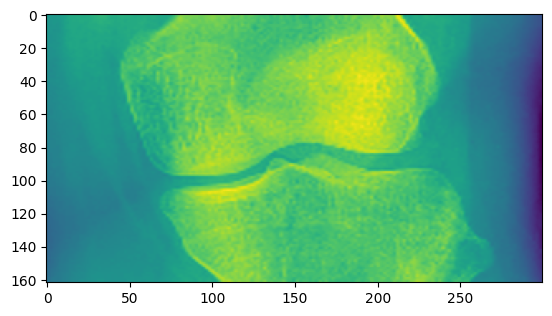

Image 2
Mean signal: 125.73471193415638
SNR: 2.1096659470871826


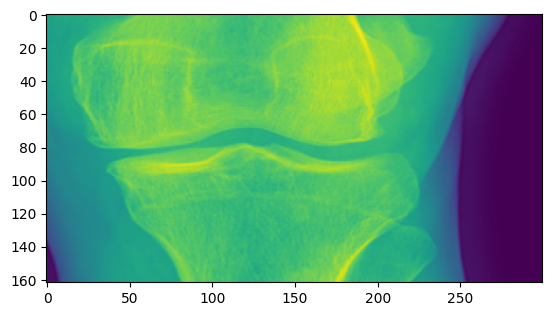

Image 3
Mean signal: 118.61179012345679
SNR: 2.038212678911101


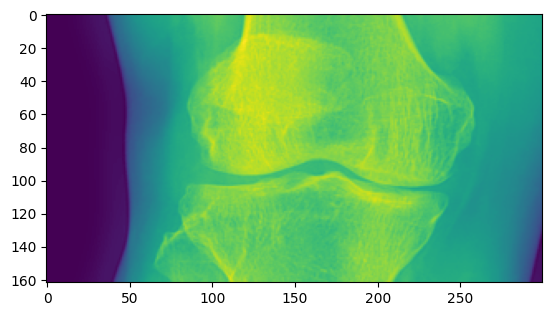

Image 4
Mean signal: 120.99364197530865
SNR: 2.1090371104309162


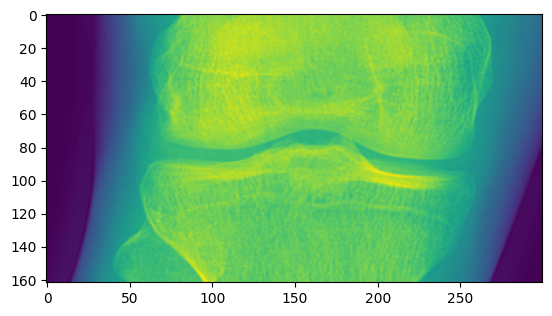

Image 5
Mean signal: 112.72509704968944
SNR: 1.5279804170392688


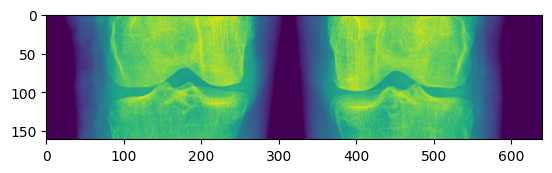

Image 6
Mean signal: 128.22362139917695
SNR: 3.264703371700256


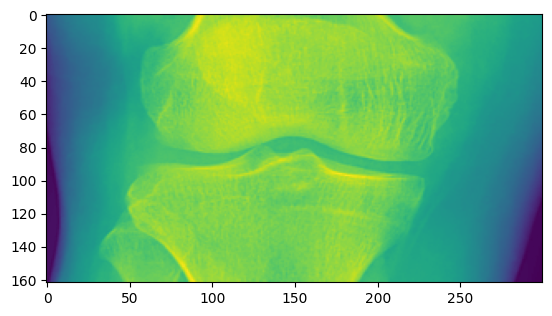

Image 7
Mean signal: 114.16477366255144
SNR: 1.9933698751399131


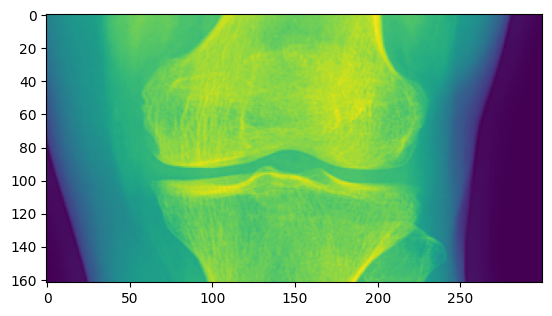

Image 8
Mean signal: 150.79783950617283
SNR: 5.336943253811298


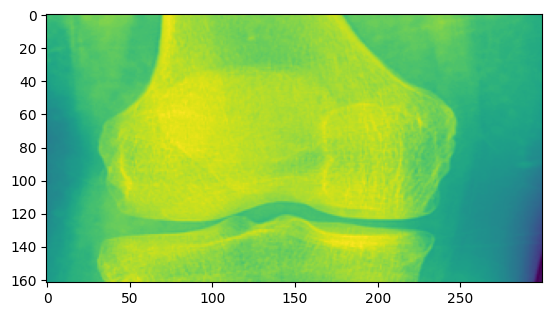

Image 9
Mean signal: 97.92851851851852
SNR: 1.4411435817561142


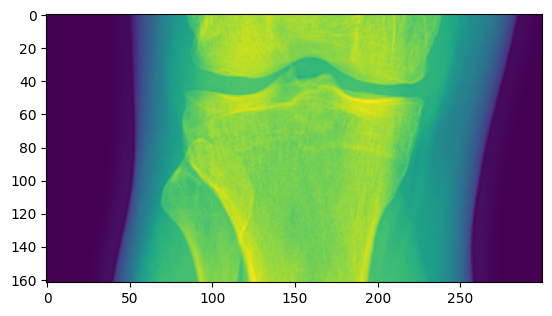

Image 10
Mean signal: 96.30790123456791
SNR: 1.4543366933465103


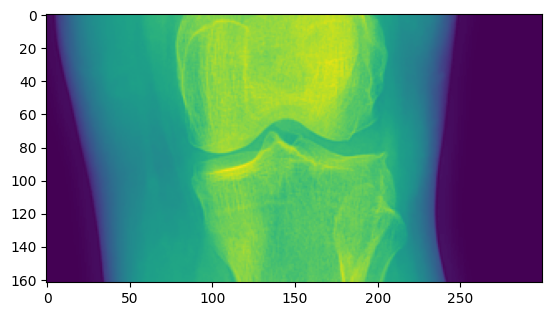

In [ ]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
import os

# Path to the directory containing the images
path = "/content/sample_data/dataset_noiseadded/MedicalExpert-I/0Normal"

# Load all image filenames in the directory
image_filenames = os.listdir(path)

# Randomly select 10 images
selected_images = np.random.choice(image_filenames, size=10, replace=False)

for i, image_filename in enumerate(selected_images):
    # Load the image
    image_path = os.path.join(path, image_filename)
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

    # Define a region of interest (ROI) that contains the anatomical structure of interest
    #roi = img[100:300, 100:300]

    # Calculate the mean and maximum intensity of the ROI to estimate the signal level
    mean_signal = np.mean(img)

    # max_signal = np.max(roi)


    # Calculate standard deviation of noise in entire image
    std_noise = np.std(img)
    snr = mean_signal / std_noise

    # Check for noise by computing the Laplacian of the image
    # laplacian_var = cv2.Laplacian(img, cv2.CV_64F).var()


    # Calculate the signal-to-noise ratio (SNR)
    # snr = mean_signal / np.sqrt(laplacian_var)

    # Print the variance of the Laplacian to the console
    print(f"Image {i+1}")
    print('Mean signal:', mean_signal)
   #  print('Laplacian variance:', laplacian_var)
    # print('Max signal:', max_signal)
    print('SNR:', snr)

    # Display the image and wait for a key press

    plt.imshow(img)
    plt.show()

In [ ]:
import os
import cv2
import numpy as np

# Define the directory path
directory_path = "/content/sample_data/dataset_noiseadded"

# Define the mean and standard deviation variables
mean = 0
std_dev = 0

# Define the count variable to keep track of the number of images
count = 0

# Loop through each subfolder in the directory
for subdir, dirs, files in os.walk(directory_path):
    # Loop through each file in the subfolder
    for file in files:
        # Load the image
        img_path = os.path.join(subdir, file)
        img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)

        # Add up the pixel values to calculate the mean
        mean += np.mean(img)

        # Add up the pixel variances to calculate the standard deviation
        std_dev += np.var(img)

        # Increment the count
        count += 1

        # Break out of the loop if we've processed 500 images
        if count >= 500:
            break

    # Break out of the loop if we've processed 500 images
    if count >= 500:
        break

# Calculate the mean and standard deviation
mean = mean / count
std_dev = np.sqrt(std_dev / count)

# Print the mean and standard deviation
print("Mean: ", mean)
print("Standard Deviation: ", std_dev)


Mean:  153.02783980389026
Standard Deviation:  40.75662736524059


In [ ]:
# import cv2
# import os
# import numpy as np
# import matplotlib.pyplot as plt

# # Define input and output directories
# input_dir = '/content/sample_data/dataset_noiseadded'
# output_dir = '/content/sample_data/gussian_noiseadded'

# # Define mean and standard deviation for Gaussian noise
# mean = 0
# std_dev = 0.5

# # Create output directory if it doesn't exist
# if not os.path.exists(output_dir):
#     os.makedirs(output_dir)

# # Loop through all subdirectories in input directory
# for root, dirs, files in os.walk(input_dir):
#     for file in files:
#         # Load image
#         img_path = os.path.join(root, file)
#         img = cv2.imread(img_path)

#         # Add Gaussian noise
#         noise = np.random.normal(mean, std_dev, img.shape)
#         noisy_img = cv2.add(img, noise.astype(np.uint8))

#         # Get output directory and file names
#         rel_dir = os.path.relpath(root, input_dir)
#         output_subdir = os.path.join(output_dir, rel_dir)
#         output_file = os.path.join(output_subdir, file)

#         # Create output subdirectory if it doesn't exist
#         if not os.path.exists(output_subdir):
#             os.makedirs(output_subdir)

#         # Save noisy image with same file name to output directory
#         cv2.imwrite(output_file, noisy_img)




In [ ]:
import cv2
import numpy as np
import os
import random

# set the path of the directory containing the knee X-ray images
input_dir = "/content/sample_data/dataset_noiseadded"

# set the output directory to save the noisy images
output_dir = "/content/sample_data/gussian_noiseadded"

# set the parameters for the quantum mottle noise
quantum_mottle_level = 5 # adjust this value to control the noise level
quantum_efficiency = random.uniform(0.5, 0.8)
exposure_time = random.uniform(0.01, 0.1) # in seconds
pixel_size = random.uniform(0.1, 0.5) # generate a random pixel size value between 0.1 and 0.5 mm
amplification_factor = random.uniform(10, 1000)


# iterate through each subfolder and image file in the input directory and add the noise
for root, dirs, files in os.walk(input_dir):
    for file in files:
        if file.endswith(".jpg") or file.endswith(".png"): # add only to jpeg and png images
            # read the input image
            input_img_path = os.path.join(root, file)
            input_img = cv2.imread(input_img_path, 0) # read the image in grayscale
            h, w = input_img.shape

            # calculate the noise standard deviation based on the image characteristics
            quantum_mottle_std = np.sqrt((quantum_efficiency * exposure_time * amplification_factor) / (pixel_size ** 2))

            # generate the noise and add it to the image
            noise = np.random.normal(0, quantum_mottle_level * quantum_mottle_std, (h, w))
            noisy_img = input_img + noise

            # clip the pixel values to the valid range (0-255)
            noisy_img = np.clip(noisy_img, 0, 255).astype(np.uint8)

            # create the output subfolder if it doesn't exist
            rel_path = os.path.relpath(root, input_dir)
            output_subdir = os.path.join(output_dir, rel_path)
            if not os.path.exists(output_subdir):
                os.makedirs(output_subdir)

            # save the noisy image to the output directory
            output_img_path = os.path.join(output_subdir, file)
            cv2.imwrite(output_img_path, noisy_img)


In [ ]:
import cv2
import numpy as np
import os
import random

# set the path of the directory containing the knee X-ray images
input_dir = "/content/sample_data/dataset_noiseadded"

# set the output directory to save the noisy images
output_dir = "/content/sample_data/gussian_noiseadded"

# set the parameters for the quantum mottle noise
quantum_mottle_level = 5 # adjust this value to control the noise level
quantum_efficiency = random.uniform(0.5, 0.8)
exposure_time = 0.05
pixel_size = 0.1
amplification_factor = 10
# iterate through each subfolder and image file in the input directory and add the noise
for root, dirs, files in os.walk(input_dir):
    for file in files:
        if file.endswith(".jpg") or file.endswith(".png"): # add only to jpeg and png images
            # read the input image
            input_img_path = os.path.join(root, file)
            input_img = cv2.imread(input_img_path, 0) # read the image in grayscale
            h, w = input_img.shape

            # calculate the noise standard deviation based on the image characteristics
            quantum_mottle_std = np.sqrt((quantum_efficiency * exposure_time * amplification_factor) / (pixel_size ** 2))

            # generate the noise and add it to the image
            noise = np.random.normal(0, quantum_mottle_level * quantum_mottle_std, (h, w))
            noisy_img = input_img + noise

            # clip the pixel values to the valid range (0-255)
            noisy_img = np.clip(noisy_img, 0, 255).astype(np.uint8)

            # create the output subfolder if it doesn't exist
            rel_path = os.path.relpath(root, input_dir)
            output_subdir = os.path.join(output_dir, rel_path)
            if not os.path.exists(output_subdir):
                os.makedirs(output_subdir)

            # save the noisy image to the output directory
            output_img_path = os.path.join(output_subdir, file)
            cv2.imwrite(output_img_path, noisy_img)


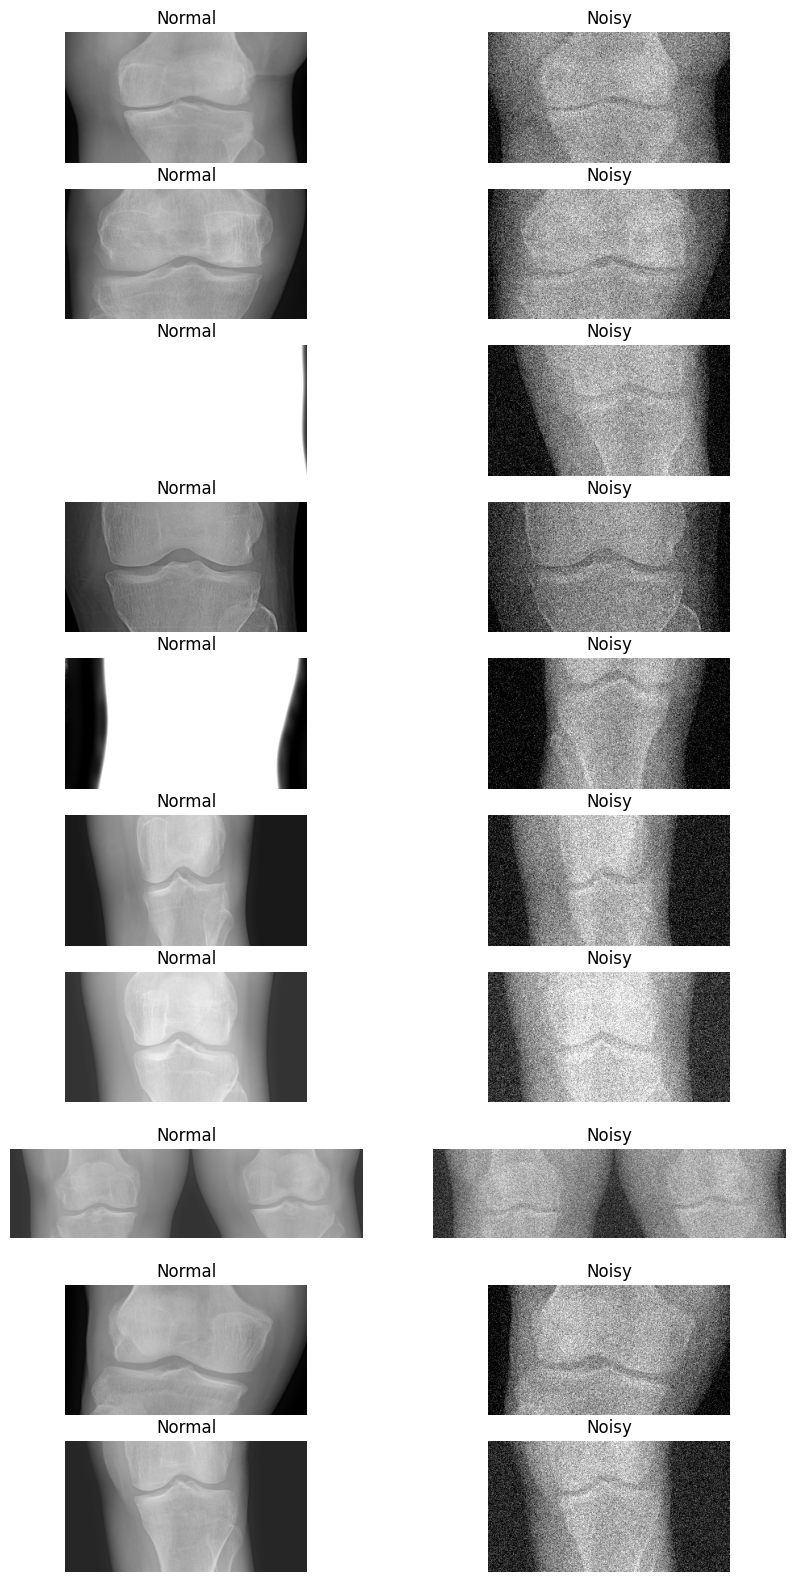

In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

# define paths to the two directories
dir_A = '/content/sample_data/dataset_noiseadded/MedicalExpert-I/0Normal'
dir_B = '/content/sample_data/gussian_noiseadded/MedicalExpert-I/0Normal'

# get the first 10 images from each directory
files_A = os.listdir(dir_A)[:10]
files_B = os.listdir(dir_B)[:10]

# plot the images side by side
fig, axs = plt.subplots(nrows=10, ncols=2, figsize=(10, 20))
for i in range(10):
    # load and plot image from directory A
    img_A = Image.open(os.path.join(dir_A, files_A[i]))
    axs[i, 0].imshow(img_A, cmap='gray')
    axs[i, 0].set_title('Normal')

    # load and plot image from directory B
    img_B = Image.open(os.path.join(dir_B, files_B[i]))
    axs[i, 1].imshow(img_B, cmap='gray')
    axs[i, 1].set_title('Noisy')

# hide the axis labels and title
for ax in axs.flat:
    ax.axis('off')
plt.show()


In [ ]:
!pip install tensorflow-addons

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 591.0/591.0 kB 25.2 MB/s eta 0:00:00


In [ ]:
pip install vit-keras

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for validators: filename=validators-0.20.0-py3-none-any.whl size=19579 sha256=82f30d9b96774f824923291a87af1384d8aa4424e4f13d998d3d57130c044f99
  Stored in directory: /root/.cache/pip/wheels/f2/ed/dd/d3a556ad245ef9dc570c6bcd2f22886d17b0b408dd3bbb9ac3
Successfully built validators


In [ ]:
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow_addons.layers import MultiHeadAttention
from sklearn.model_selection import train_test_split
import tensorflow_addons as tfa
import torchvision.transforms as transforms
import numpy as np
from tensorflow import keras
import os
from PIL import Image
from torchvision import transforms
import matplotlib.pyplot as plt
from torchvision.transforms import Resize
from torchvision.transforms import Normalize
import tensorflow

/usr/local/lib/python3.10/dist-packages/tensorflow_addons/utils/tfa_eol_msg.py:23: UserWarning: 

TensorFlow Addons (TFA) has ended development and introduction of new features.
TFA has entered a minimal maintenance and release mode until a planned end of life in May 2024.
Please modify downstream libraries to take dependencies from other repositories in our TensorFlow community (e.g. Keras, Keras-CV, and Keras-NLP). 

For more information see: https://github.com/tensorflow/addons/issues/2807 

  warnings.warn(


In [ ]:
class PositionalEncoding(layers.Layer):
    def __init__(self, num_patches, hidden_dim, **kwargs):
        super(PositionalEncoding, self).__init__(**kwargs)
        self.position_embedding = layers.Embedding(input_dim=num_patches, output_dim=hidden_dim)

    def call(self, x):
        positions = tf.range(start=0, limit=tf.shape(x)[1], delta=1)
        position_embeddings = self.position_embedding(positions)
        position_embeddings = tf.expand_dims(position_embeddings, axis=0)
        position_embeddings = tf.tile(position_embeddings, [tf.shape(x)[0], 1, 1])
        print("x shape:", x.shape)
        print("position embeddings shape:", position_embeddings.shape)
        return x + position_embeddings

In [ ]:
class TransformerXLAttention(layers.Layer):
    def __init__(self, d_model, n_heads, dropout_rate=0.1):
        super(TransformerXLAttention, self).__init__()
        self.d_model = d_model
        self.n_heads = n_heads

        self.key_dense = layers.Dense(d_model)
        self.query_dense = layers.Dense(d_model)
        self.value_dense = layers.Dense(d_model)

        self.dropout = layers.Dropout(dropout_rate)

        self.output_dense = layers.Dense(d_model)

    def call(self, inputs, memory=None):
        if memory is None:
            memory = inputs

        batch_size = tf.shape(inputs)[0]
        seq_len = tf.shape(inputs)[1]

        keys = self.key_dense(memory)
        queries = self.query_dense(inputs)
        values = self.value_dense(memory)
        print("batch_size:", batch_size)
        print("seq_len:", seq_len)
        print("n_heads:", self.n_heads)
        print("d_model // n_heads:", self.d_model // self.n_heads)
        print("queries shape before reshape:", queries.shape)
        keys = tf.reshape(keys, (batch_size, seq_len, self.n_heads, self.d_model // self.n_heads))

        queries = tf.reshape(queries, (batch_size, seq_len, self.n_heads, self.d_model // self.n_heads))
        values = tf.reshape(values, (batch_size, seq_len, self.n_heads, self.d_model // self.n_heads))

        keys = tf.transpose(keys, perm=[0, 2, 1, 3])
        queries = tf.transpose(queries, perm=[0, 2, 1, 3])
        values = tf.transpose(values, perm=[0, 2, 1, 3])

        attention_scores = tf.matmul(queries, keys, transpose_b=True)
        attention_scores = tf.nn.softmax(attention_scores / tf.sqrt(tf.cast(self.d_model // self.n_heads, tf.float32)), axis=-1)
        attention_scores = self.dropout(attention_scores)

        attention_output = tf.matmul(attention_scores, values)
        attention_output = tf.transpose(attention_output, perm=[0, 2, 1, 3])
        attention_output = tf.reshape(attention_output, (batch_size, seq_len, self.d_model))

        output = self.output_dense(attention_output)
        return output


In [ ]:
class EfficientAttention(layers.Layer):
    def __init__(self, hidden_dim, num_heads, dropout_rate=0.05, *args, **kwargs):
        super().__init__(*args, **kwargs)
        self.hidden_dim = hidden_dim
        self.num_heads = num_heads
        self.dropout = layers.Dropout(dropout_rate)
        self.out_dense = layers.Dense(hidden_dim)
        self.layer_norm = layers.LayerNormalization()

        self.attention_layer = TransformerXLAttention(hidden_dim, num_heads, dropout_rate)
        self.mlp = keras.Sequential([
            layers.Dense(hidden_dim, activation="relu"),
            layers.BatchNormalization(),
            layers.Dense(hidden_dim),
            layers.BatchNormalization()
        ])

    def call(self, x, training=None):
        # Apply attention
        attention_output = self.attention_layer(x)

        # Normalize and add
        x = layers.Add()([self.layer_norm(x), attention_output])

        # MLP
        mlp_output = self.mlp(x)

        # Normalize and add
        x = layers.Add()([self.layer_norm(x), mlp_output])
        return x

In [ ]:
class Tokenizer(layers.Layer):
    def __init__(self, patch_size, hidden_dim, **kwargs):
        super(Tokenizer, self).__init__(**kwargs)
        self.patch_size = patch_size
        self.hidden_dim = hidden_dim
        print(f"hidden_dim: {self.hidden_dim}")

    def build(self, input_shape):
        self.num_patches = (input_shape[1] // self.patch_size) * (input_shape[2] // self.patch_size)
        self.positional_encoding_layer = PositionalEncoding(num_patches=self.num_patches, hidden_dim=self.hidden_dim)
        self.dense_layer = layers.Dense(self.hidden_dim, activation='relu')

    def call(self, x):
        print('Input shape:', x.shape)

        x = tf.image.extract_patches(
            x,
            sizes=[1, self.patch_size, self.patch_size, 1],
            strides=[1, self.patch_size, self.patch_size, 1],
            rates=[1, 1, 1, 1],
            padding='VALID'
        )
        print('After extract_patches:', x.shape)

        num_patches = x.shape[1]  # Calculate the number of patches
        x = layers.Reshape((num_patches, -1))(x)
        print('After Reshape:', x.shape)

        x = self.dense_layer(x)
        print('After Dense layer:', x.shape)

        x = self.positional_encoding_layer(x)
        print('After PositionalEncoding:', x.shape)

        return x

In [ ]:
def create_transformer_block(x, hidden_dim, num_heads, mlp_unit1, mlp_unit2):
    # Original input
    original_x = x

    # Efficient Attention
    efficient_attention = EfficientAttention(hidden_dim, num_heads)
    attention_output = efficient_attention(x)

    # Add and normalize
    x = layers.Add()([x, layers.LayerNormalization()(attention_output)])

    # MLP
    mlp = keras.Sequential(
        [
            layers.Dense(mlp_unit1, activation="relu"),
            layers.BatchNormalization(),
            layers.Dense(mlp_unit2),
            layers.BatchNormalization(),
        ]
    )
    mlp_output = mlp(x)

    # Add and normalize
    x = layers.Add()([x, layers.LayerNormalization()(mlp_output)])

    # Add residual connection
    x = layers.Add()([x, original_x])
    return x

In [ ]:
def create_encoder(input_shape, patch_size, hidden_dim, num_heads, num_transformer_layers, mlp_unit1, mlp_unit2):
    inputs = keras.Input(shape=input_shape)

    # Add Tokenizer layer
    tokenizer = Tokenizer(patch_size=patch_size, hidden_dim=hidden_dim)

    x = tokenizer(inputs)  # Define x by passing inputs through Tokenizer

    for i in range(num_transformer_layers):
        x = create_transformer_block(x, hidden_dim, num_heads, mlp_unit1, mlp_unit2)

    x = layers.GlobalAveragePooling1D()(x)
    x = layers.Dense(hidden_dim, activation='relu')(x)

    return keras.Model(inputs=inputs, outputs=x, name="encoder")


In [ ]:
def create_decoder(input_shape, num_channels, hidden_dim, num_heads, num_transformer_layers, mlp_units):
    input_x = layers.Input(shape=input_shape)

    x = layers.Dense(8 * 8 * hidden_dim, activation='relu')(input_x)
    x = layers.Reshape((8, 8, hidden_dim))(x)

    x_flat = layers.Reshape((-1, hidden_dim))(x)

    for _ in range(num_transformer_layers):
        x_flat = create_transformer_block(x_flat, hidden_dim, num_heads, mlp_units[0], mlp_units[1])

    x = layers.Reshape((8, 8, hidden_dim))(x_flat)

    # Increase filters in first layers and gradually decrease towards the final layer
    filters = [256, 128, 64, 32]  # you can adjust these values

    x = layers.Conv2DTranspose(filters=filters[0], kernel_size=3, strides=2, padding="same", activation='relu')(x)
    x = layers.BatchNormalization()(x)
    x = layers.Conv2DTranspose(filters=filters[1], kernel_size=3, strides=2, padding="same", activation='relu')(x)
    x = layers.BatchNormalization()(x)
    x = layers.Conv2DTranspose(filters=filters[2], kernel_size=3, strides=1, padding="same", activation='relu')(x)
    x = layers.BatchNormalization()(x)

    # Additional Conv2DTranspose layer to upscale from 32x32 to 64x64
    x = layers.Conv2DTranspose(filters=filters[3], kernel_size=3, strides=2, padding="same", activation='relu')(x)
    x = layers.BatchNormalization()(x)

    # Last layer uses num_channels filters
    decoded = layers.Conv2DTranspose(filters=num_channels, kernel_size=3, strides=1, padding="same", activation="tanh")(x)
    decoder = keras.Model(inputs=input_x, outputs=decoded, name="decoder")

    return decoder


In [ ]:
def create_autoencoder(encoder, decoder):
    input_img = tf.keras.Input(shape=(image_size, image_size, num_channels))
    encoded = encoder(input_img)
    decoded = decoder(encoded)
    return tf.keras.Model(inputs=input_img, outputs=decoded)

# # Combining Encoder and Decoder
# def create_autoencoder(encoder, decoder):
#     input_img = tf.keras.Input(shape=(image_size, image_size, num_channels))
#     cls_token = tf.keras.Input(shape=(hidden_dim,), name="cls_token")
#     encoded = encoder([input_img, cls_token])
#     decoded = decoder(encoded)
#     return tf.keras.Model(inputs=[input_img, cls_token], outputs=decoded)


In [ ]:
# Hyperparameters
image_size = 64
num_channels = 1
patch_size = 4
hidden_dim = 128
num_heads = 16
num_transformer_layers = 8
mlp_units = [128, 128] # Adjusting the second MLP unit to match hidden_dim
attention_window_size = 8
# num_patches = (image_size // patch_size) ** 2

In [ ]:
# Define the data preprocessing transform
preprocess = transforms.Compose([
    transforms.Grayscale(),
    transforms.Resize((image_size, image_size), interpolation=Image.BICUBIC),
    transforms.ToTensor(),
    transforms.Lambda(lambda x: x * 2.0 - 1.0),  # Adjusts range to [-1, 1]
])

In [ ]:
def load_images(dataset_directory):
    images = []
    for root, _, files in os.walk(dataset_directory):
        for img_name in files:
            img_path = os.path.join(root, img_name)
            img = Image.open(img_path)
            img_array = preprocess(img)
            img_array = np.array(img_array)
            img_array = np.transpose(img_array, (1, 2, 0))
            images.append(img_array)
    return np.array(images)

In [ ]:
# Dataset folder paths
noisy_dataset_directory = '/content/sample_data/gussian_noiseadded'
denoised_dataset_directory = '/content/sample_data/dataset_noiseadded'

In [ ]:
# Load the datasets
noisy_dataset = load_images(noisy_dataset_directory)
denoised_dataset = load_images(denoised_dataset_directory)

In [ ]:
# Visualize preprocessed images


def show_images(images, titles):
    fig, axes = plt.subplots(1, len(images), figsize=(15, 15))
    for ax, img, title in zip(axes, images, titles):
        ax.imshow(img.squeeze(), cmap='gray')
        ax.set_title(title)
        ax.axis('off')
    plt.show()

# Visualize sample images from both datasets
sample_noisy_image = noisy_dataset[0]
sample_denoised_image = denoised_dataset[0]
show_images([sample_noisy_image, sample_denoised_image], ['Noisy Image', 'Denoised Image'])

In [ ]:
# Split the datasets into train, validation, and test sets
X_train_noisy, X_temp_noisy, X_train, X_temp = train_test_split(noisy_dataset, denoised_dataset, test_size=0.4, random_state=42)
X_val_noisy, X_test_noisy, X_val, X_test = train_test_split(X_temp_noisy, X_temp, test_size=0.5, random_state=42)

In [ ]:
# Convert NumPy arrays to TensorFlow tensors
X_train_noisy = tf.convert_to_tensor(X_train_noisy, dtype=tf.float32)
X_test_noisy = tf.convert_to_tensor(X_test_noisy, dtype=tf.float32)
X_val_noisy = tf.convert_to_tensor(X_val_noisy, dtype=tf.float32)
X_train = tf.convert_to_tensor(X_train, dtype=tf.float32)
X_test = tf.convert_to_tensor(X_test, dtype=tf.float32)
X_val = tf.convert_to_tensor(X_val, dtype=tf.float32)

In [ ]:
input_shape = (image_size, image_size, num_channels)

# Create and compile the autoencoder model
encoder = create_encoder(input_shape, patch_size, hidden_dim, num_heads, num_transformer_layers, mlp_units[0], mlp_units[1])
decoder = create_decoder(input_shape=(encoder.output_shape[1:]), num_channels=1, hidden_dim=hidden_dim, num_heads=num_heads, num_transformer_layers=num_transformer_layers, mlp_units=mlp_units)

In [ ]:
def charbonnier_loss(y_true, y_pred, epsilon=1e-3):
    return tf.reduce_mean(tf.sqrt(tf.square(y_true - y_pred) + tf.square(epsilon)))

In [ ]:
autoencoder = create_autoencoder(encoder, decoder)

autoencoder.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4), loss=charbonnier_loss)

In [ ]:
# Train the autoencoder
batch_size = 32
epochs = 200

In [ ]:
#training Line
from tensorflow.keras.callbacks import EarlyStopping

# Define early stopping callback
early_stop = EarlyStopping(monitor='val_loss', patience=200)

# Train the autoencoder model with early stopping
history = autoencoder.fit(X_train_noisy, X_train, epochs=epochs, batch_size=batch_size, validation_data=(X_val_noisy, X_val), callbacks=[early_stop])

In [ ]:
def denormalize(tensor):
    return (tensor + 1) / 2

In [ ]:
# Print layer shapes
for layer in autoencoder.layers:
    print("Layer: ", layer.name)
    config = layer.get_config()
    print("Input shape: ", config.get('batch_input_shape'))
    print("Output shape: ", layer.output_shape)

Layer:  input_3
Input shape:  (None, 64, 64, 1)
Output shape:  [(None, 64, 64, 1)]
Layer:  encoder
Input shape:  None
Output shape:  (None, 128)
Layer:  decoder
Input shape:  None
Output shape:  (None, 64, 64, 1)


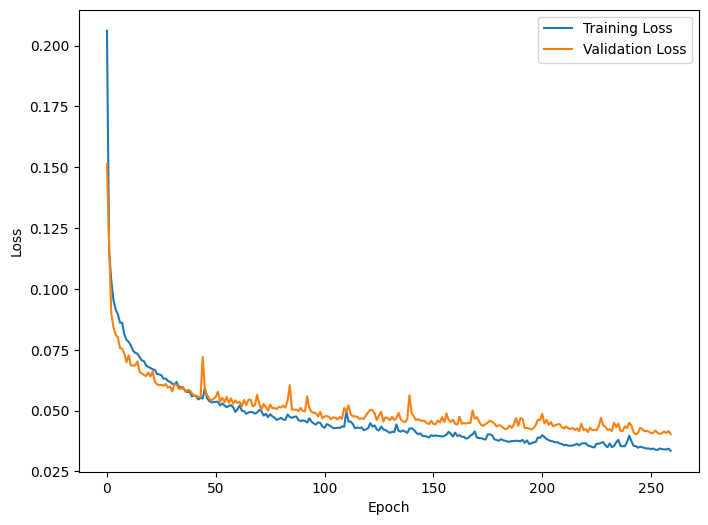

In [ ]:
def plot_loss(history):
    plt.figure(figsize=(8, 6))
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()


plot_loss(history)

In [ ]:
# Denoise images using the trained autoencoder
denoised_images = autoencoder.predict(X_test_noisy, batch_size)


Input shape: (None, 64, 64, 1)
After extract_patches: (None, 16, 16, 16)
After Reshape: (None, 16, 256)
After Dense layer: (None, 16, 128)
x shape: (None, 16, 128)
position embeddings shape: (None, 16, 128)
After PositionalEncoding: (None, 16, 128)
batch_size: Tensor("model/encoder/efficient_attention/transformer_xl_attention/strided_slice:0", shape=(), dtype=int32)
seq_len: Tensor("model/encoder/efficient_attention/transformer_xl_attention/strided_slice_1:0", shape=(), dtype=int32)
n_heads: 16
d_model // n_heads: 8
queries shape before reshape: (None, 16, 128)
batch_size: Tensor("model/encoder/efficient_attention_1/transformer_xl_attention_1/strided_slice:0", shape=(), dtype=int32)
seq_len: Tensor("model/encoder/efficient_attention_1/transformer_xl_attention_1/strided_slice_1:0", shape=(), dtype=int32)
n_heads: 16
d_model // n_heads: 8
queries shape before reshape: (None, 16, 128)
batch_size: Tensor("model/encoder/efficient_attention_2/transformer_xl_attention_2/strided_slice:0", shap

In [ ]:
# Denormalize the denoised images
denoised_images = denormalize(denoised_images)

In [ ]:
# Rescale the denoised images
denoised_images = tf.clip_by_value(denoised_images, clip_value_min=0.0, clip_value_max=1.0)

In [ ]:
X_test = tf.cast(X_test, dtype=tf.float32)
denoised_images = tf.cast(denoised_images, dtype=tf.float32)

In [ ]:
# Also denormalize the original test images
X_test_denormalized = denormalize(X_test)

In [ ]:
# Evaluate the denoised images
psnr = tf.image.psnr(X_test_denormalized, denoised_images, max_val=1.0)
ssim = tf.image.ssim(X_test_denormalized, denoised_images, max_val=1.0)

In [ ]:
print(f"PSNR: {np.mean(psnr)}")
print(f"SSIM: {np.mean(ssim)}")

PSNR: 32.17729949951172
SSIM: 0.8725680112838745


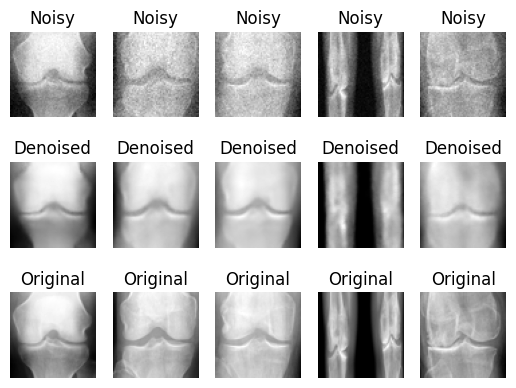

In [ ]:
import matplotlib.pyplot as plt

n = 5  # Number of images to visualize

for i in range(n):
    # Display noisy image
    plt.subplot(3, n, i + 1)
    plt.imshow(denormalize(tf.squeeze(X_test_noisy[i])), cmap='gray')
    plt.title("Noisy")
    plt.axis('off')

    # Display denoised image produced by the autoencoder
    plt.subplot(3, n, i + n + 1)
    plt.imshow(tf.clip_by_value(tf.squeeze(denoised_images[i]), 0, 1), cmap='gray')
    plt.title("Denoised")
    plt.axis('off')

    # Display original denoised image
    plt.subplot(3, n, i + 2 * n + 1)
    plt.imshow(tf.squeeze(X_test_denormalized[i]), cmap='gray')
    plt.title("Original")
    plt.axis('off')

plt.show()

In [ ]:
def normalized_cross_correlation(a, b):
    a_mean = np.mean(a)
    b_mean = np.mean(b)
    numerator = np.sum((a - a_mean) * (b - b_mean))
    denominator = np.sqrt(np.sum((a - a_mean) ** 2) * np.sum((b - b_mean) ** 2))
    ncc = numerator / denominator
    return ncc

# Compute Normalized Cross-Correlation (NCC)
ncc = normalized_cross_correlation(X_test_denormalized, denoised_images)

print(f"NCC: {ncc}")

NCC: 0.9623854160308838


In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

# Flattening the arrays for simplicity
original_images_flat = tf.reshape(X_test_denormalized, [-1])
denoised_images_flat = tf.reshape(denoised_images, [-1])

# Compute Mean Squared Error (MSE)
mse = mean_squared_error(original_images_flat, denoised_images_flat)

# Compute Mean Absolute Error (MAE)
mae = mean_absolute_error(original_images_flat, denoised_images_flat)

# Compute Peak Mean Squared Error (PMSE)
max_pixel_value = 1.0  # adjust if your images have a different range
pmse = mse / (max_pixel_value ** 2)

# Compute Root Mean Square Error (RMSE)
rmse = np.sqrt(mse)

print(f"MSE: {mse}")
print(f"MAE: {mae}")
print(f"PMSE: {pmse}")
print(f"RMSE: {rmse}")


MSE: 0.003624685574322939
MAE: 0.022808605805039406
PMSE: 0.003624685574322939
RMSE: 0.0602053627371788


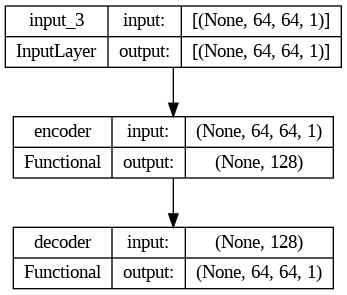

In [ ]:
from tensorflow.keras.utils import plot_model
from IPython.display import Image
# Assuming your model is stored in the variable `autoencoder`
plot_model(autoencoder, to_file='model.png', show_shapes=True, show_layer_names=True)

Image(filename='model.png')


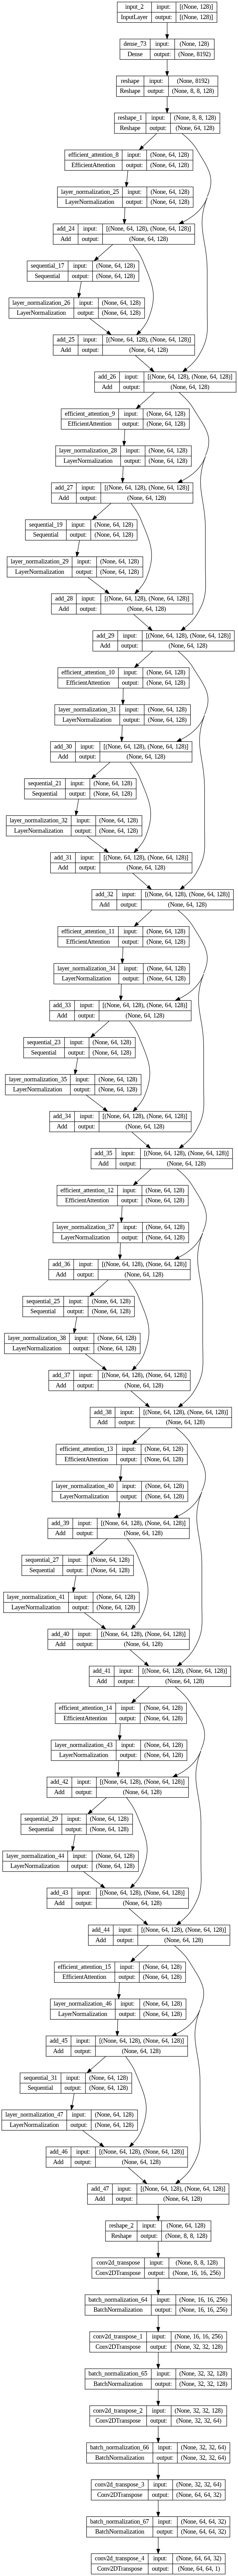

In [ ]:
# Plot the main autoencoder model
plot_model(autoencoder, to_file='autoencoder_model.png', show_shapes=True, show_layer_names=True)

# Assuming that your encoder and decoder are stored in the variables `encoder` and `decoder` respectively
plot_model(encoder, to_file='encoder_model.png', show_shapes=True, show_layer_names=True)
plot_model(decoder, to_file='decoder_model.png', show_shapes=True, show_layer_names=True)


In [ ]:
!pip install imquality

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
ERROR: Could not find a version that satisfies the requirement imquality (from versions: none)
ERROR: No matching distribution found for imquality


In [ ]:
print('X_train shape:', X_train.shape)
print('X_test shape:', X_test.shape)
print('X_test_noisy shape:', X_test_noisy.shape)

X_train shape: (7851, 64, 64, 1)
X_test shape: (2618, 64, 64, 1)
X_test_noisy shape: (2618, 64, 64, 1)
X_train shape: (7851, 64, 64, 1)
X_test shape: (2618, 64, 64, 1)
X_test_noisy shape: (2618, 64, 64, 1)
